In [5]:
from tensorflow.keras.datasets import fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

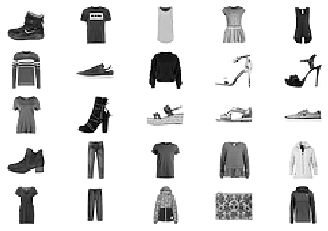

In [17]:
from matplotlib import pyplot as plt
import numpy as np

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K

In [8]:
xtrain.shape

(60000, 28, 28)

In [20]:
xtrain = xtrain / 255

In [21]:
K.clear_session()

m = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
])

In [22]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
epochs=100
m.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = m.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 4ms/step - loss: 0.5870 - accuracy: 0.7985 - val_loss: 0.4714 - val_accuracy: 0.8332
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.8515 - val_loss: 0.4051 - val_accuracy: 0.8585
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3854 - accuracy: 0.8635 - val_loss: 0.3852 - val_accuracy: 0.8641
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3528 - accuracy: 0.8748 - val_loss: 0.3592 - val_accuracy: 0.8733
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8805 - val_loss: 0.3596 - val_accuracy: 0.8727
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3173 - accuracy: 0.8850 - val_loss: 0.3796 - val_accuracy: 0.8602
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3076 - accuracy: 0.8885 - val_loss: 0.3475 - val_accuracy: 0.8736

Epoch 58/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0922 - accuracy: 0.9674 - val_loss: 0.4063 - val_accuracy: 0.8909
Epoch 59/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0841 - accuracy: 0.9702 - val_loss: 0.4297 - val_accuracy: 0.8932
Epoch 60/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0813 - accuracy: 0.9721 - val_loss: 0.4206 - val_accuracy: 0.8892
Epoch 61/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0857 - accuracy: 0.9691 - val_loss: 0.4422 - val_accuracy: 0.8935
Epoch 62/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0838 - accuracy: 0.9706 - val_loss: 0.4522 - val_accuracy: 0.8866
Epoch 63/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9701 - val_loss: 0.4383 - val_accuracy: 0.8931
Epoch 64/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0789 - accuracy: 0.9716 - val_loss: 0.4489 - val_accuracy:

In [25]:
m.evaluate(xtest, ytest, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 170.5113 - accuracy: 0.8571


[170.5113067626953, 0.8571000099182129]

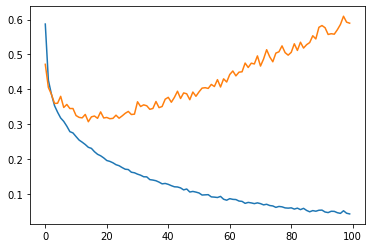

In [26]:
# inspect the history object
plt.plot(range(epochs), hist.history['loss'])
plt.plot(range(epochs), hist.history['val_loss'])

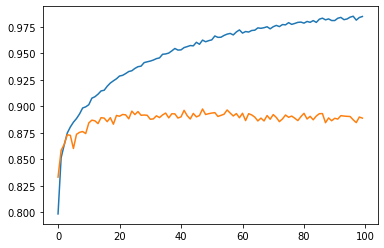

In [27]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['val_accuracy'])

In [28]:
# save a list of np.arrays with the weights
w = m.get_weights()

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


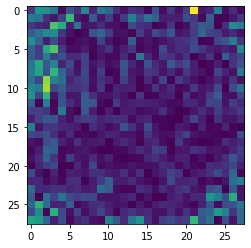

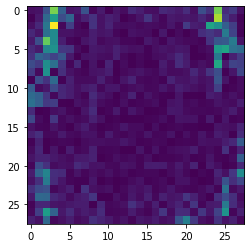

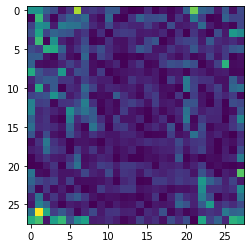

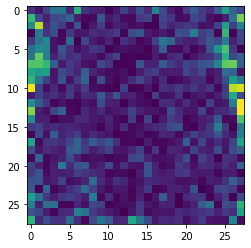

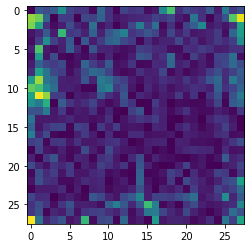

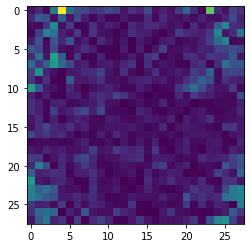

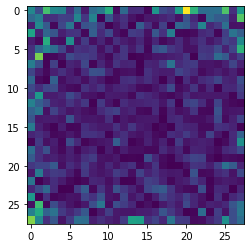

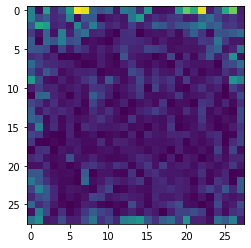

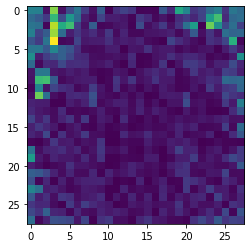

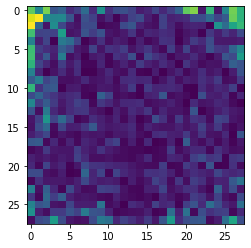

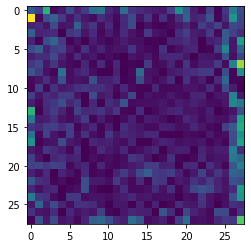

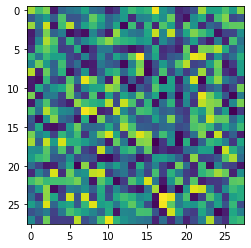

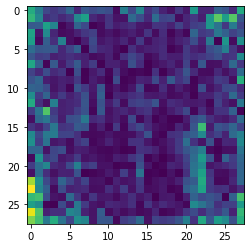

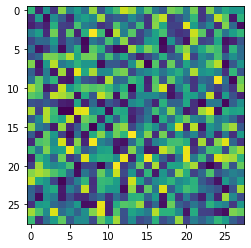

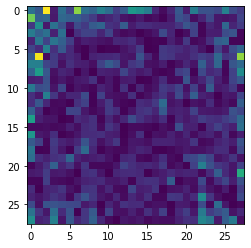

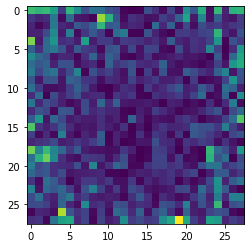

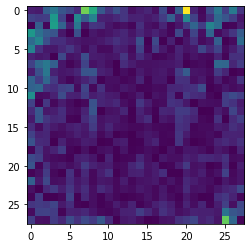

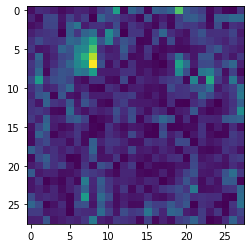

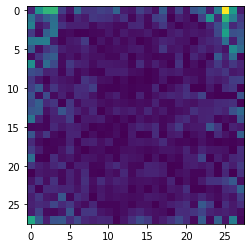

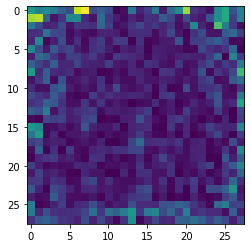

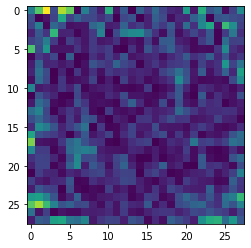

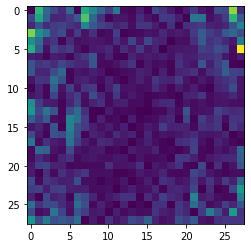

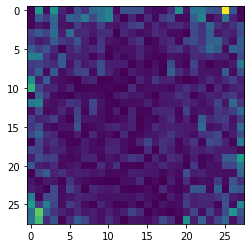

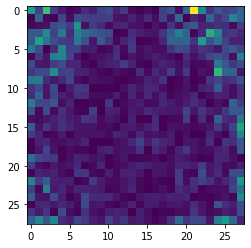

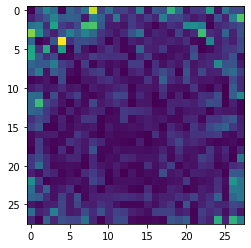

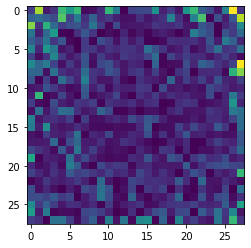

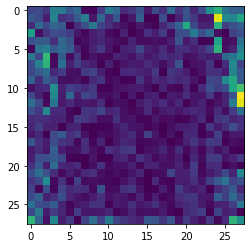

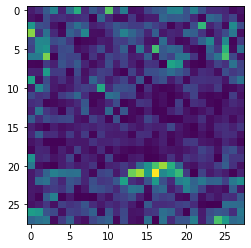

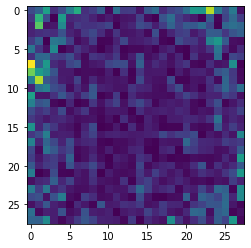

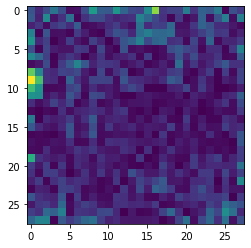

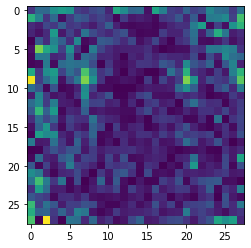

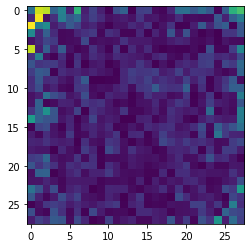

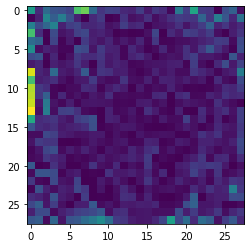

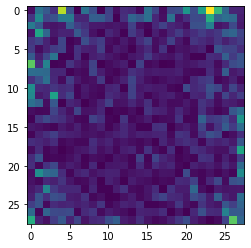

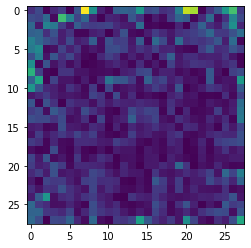

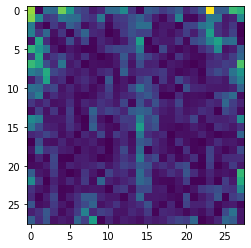

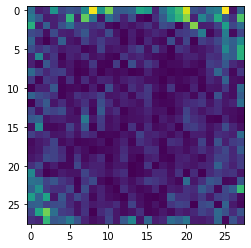

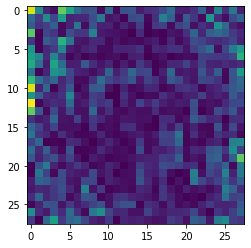

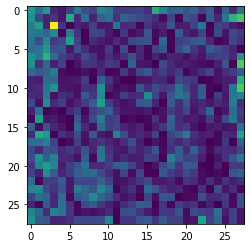

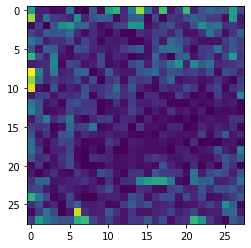

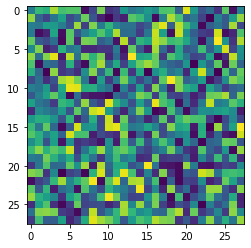

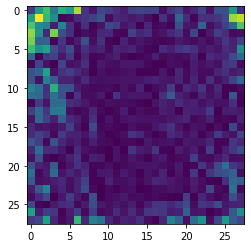

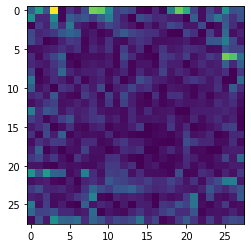

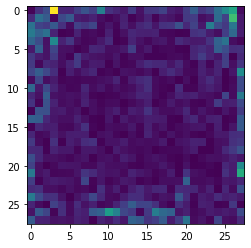

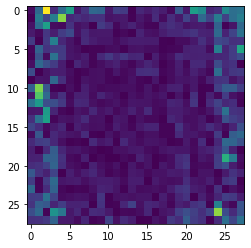

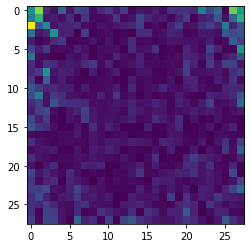

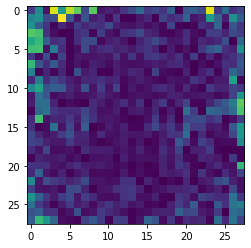

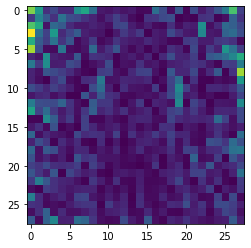

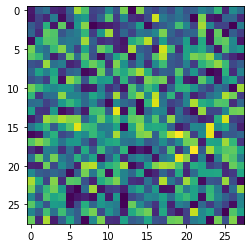

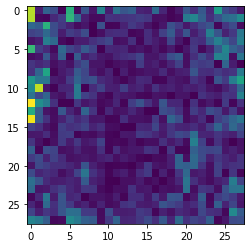

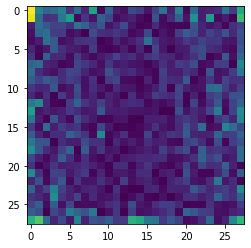

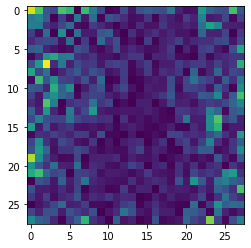

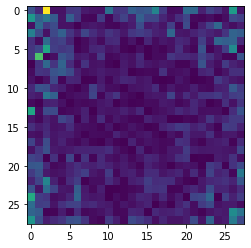

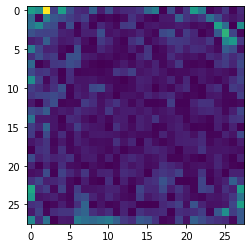

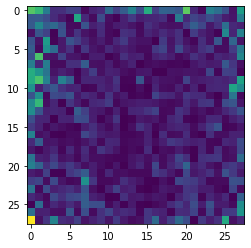

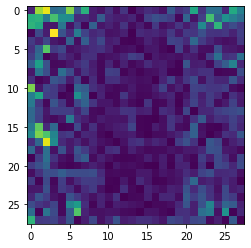

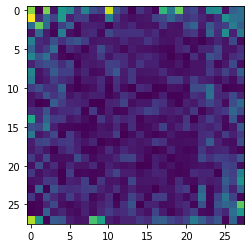

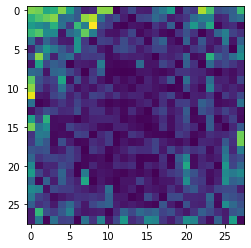

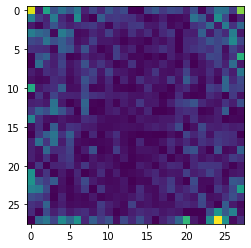

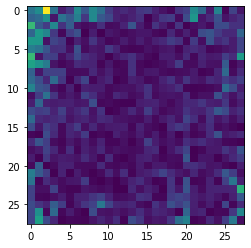

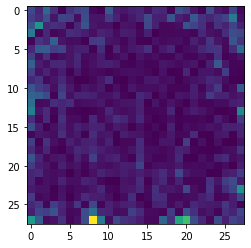

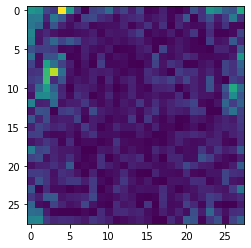

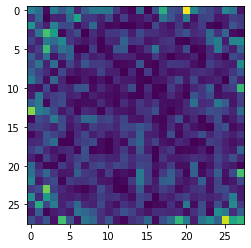

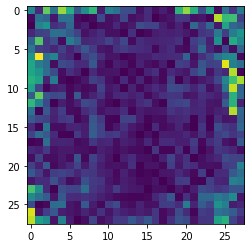

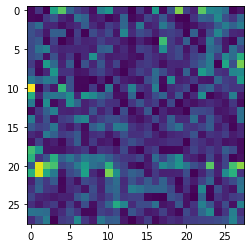

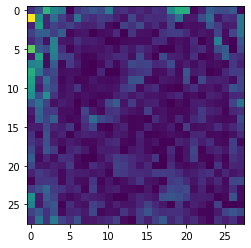

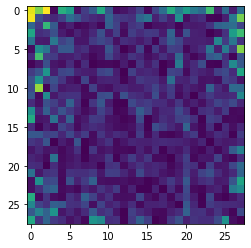

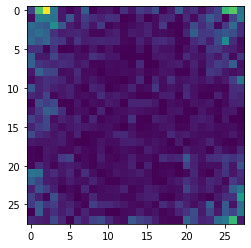

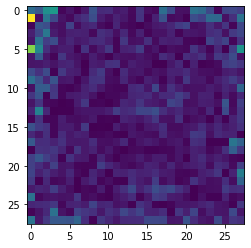

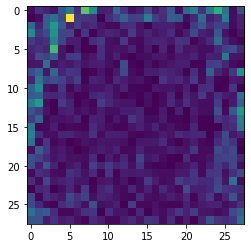

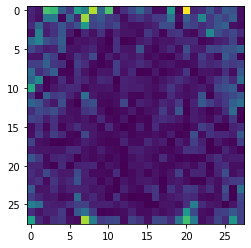

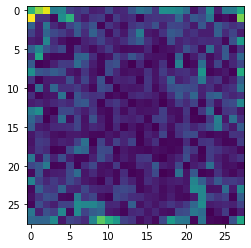

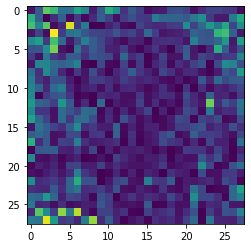

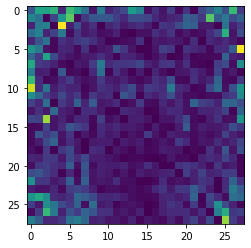

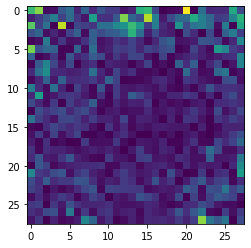

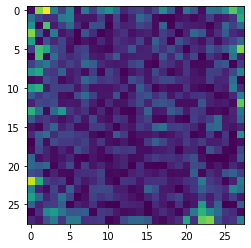

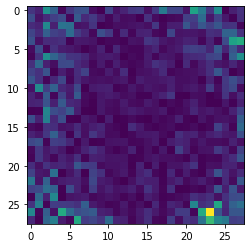

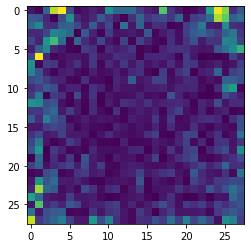

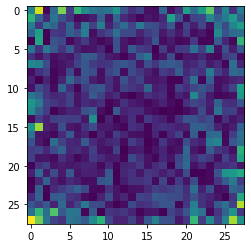

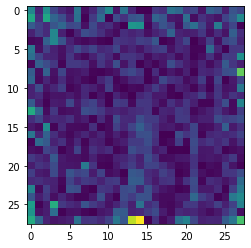

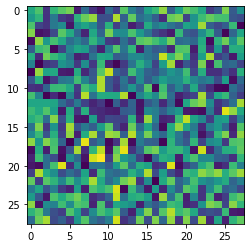

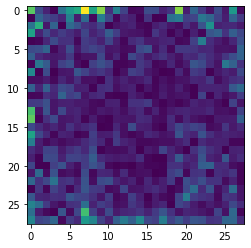

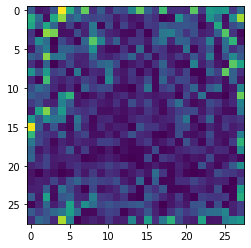

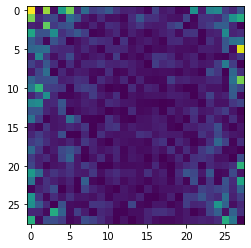

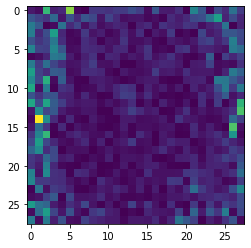

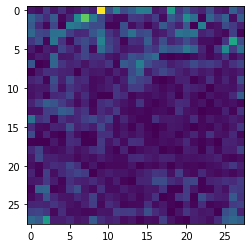

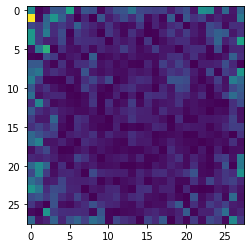

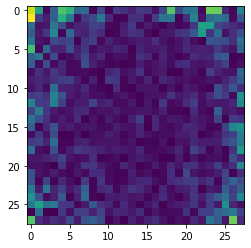

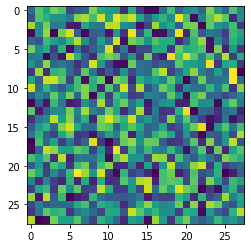

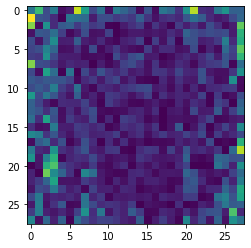

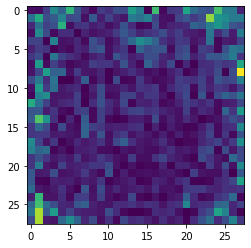

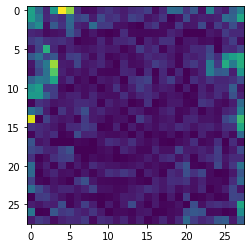

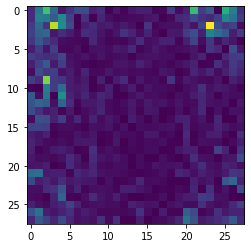

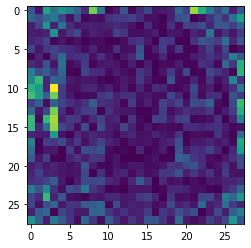

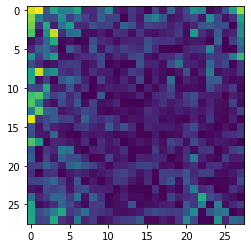

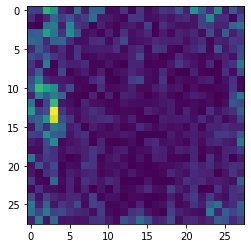

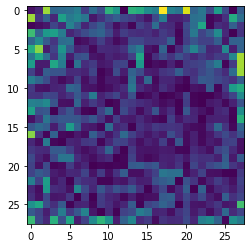

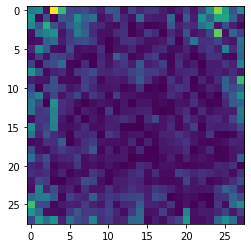

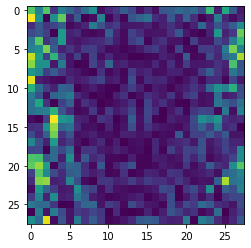

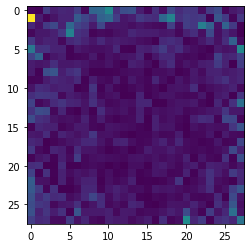

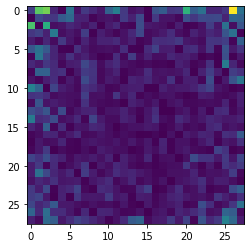

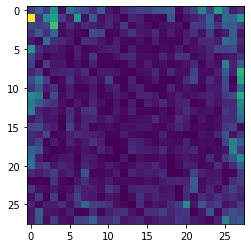

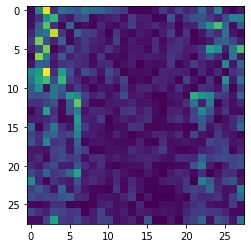

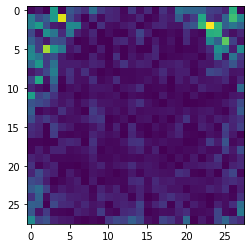

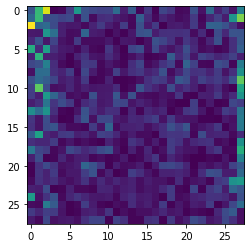

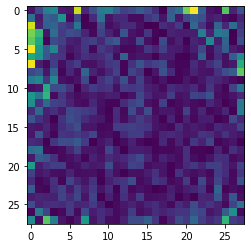

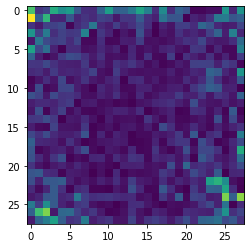

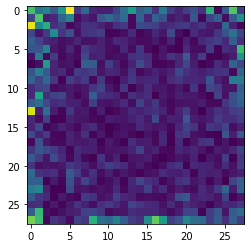

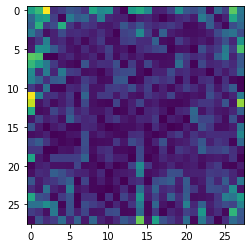

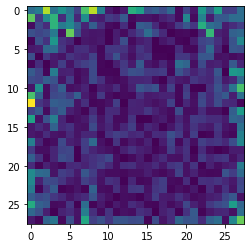

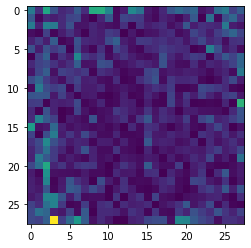

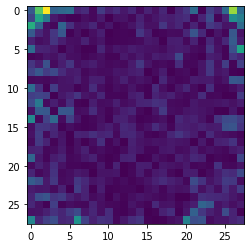

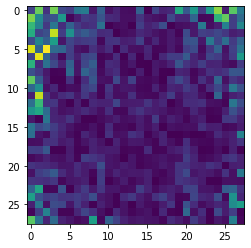

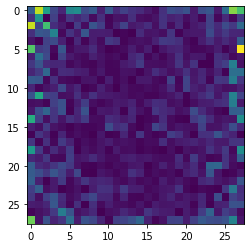

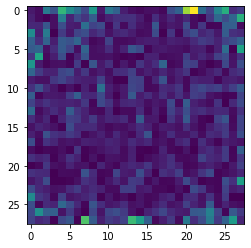

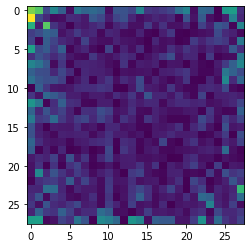

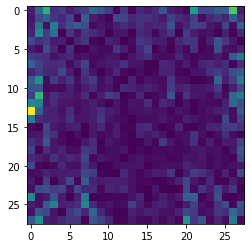

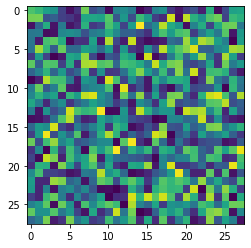

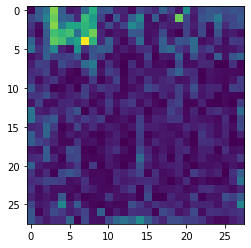

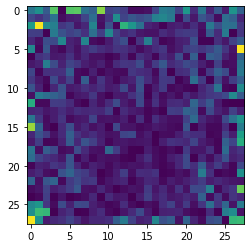

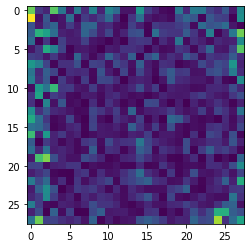

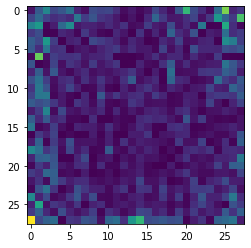

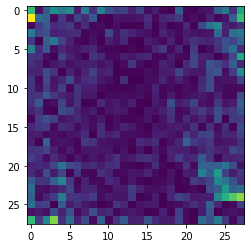

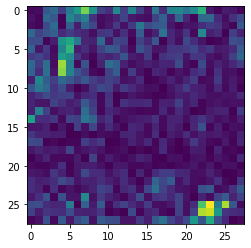

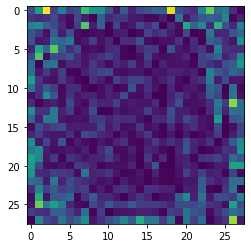

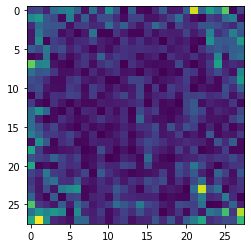

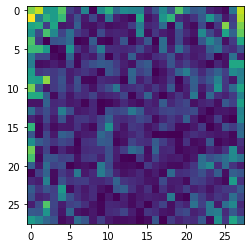

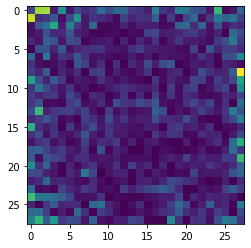

In [29]:
for k in range(128):
    weights = []
    for i in range(784):
        weights.append(w[0][i][k])
    weights = np.asarray(weights, dtype=float)

    plt.figure()
    plt.imshow(np.abs(weights).reshape((28, 28)))

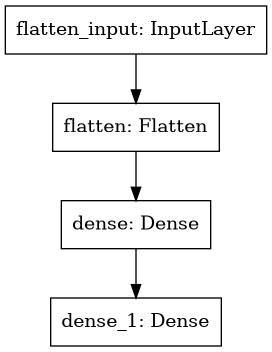

In [30]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(m,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)